-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.0     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


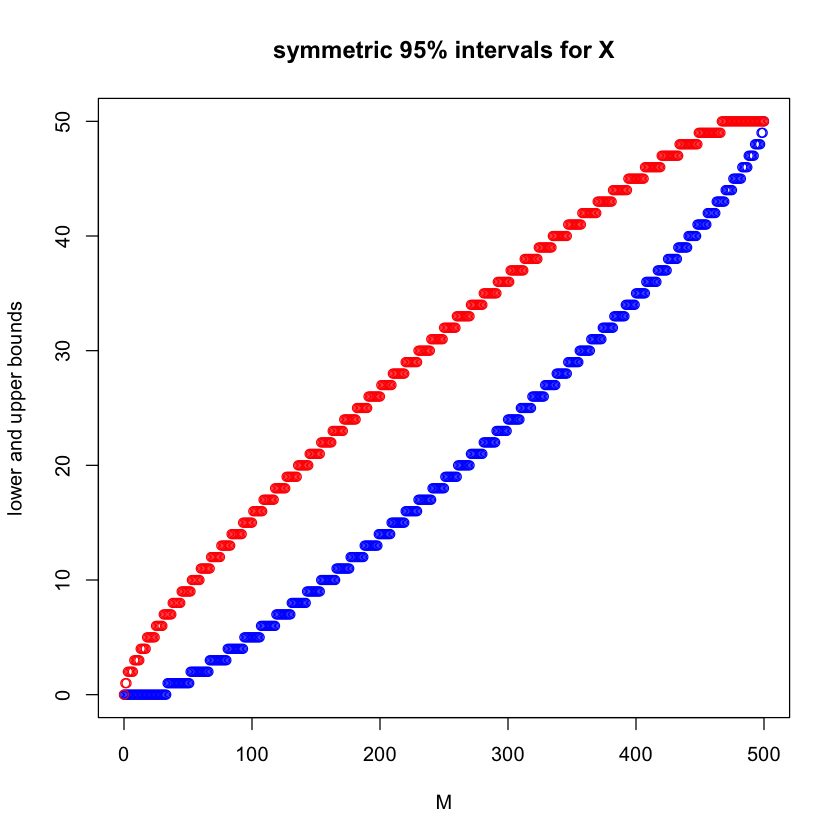

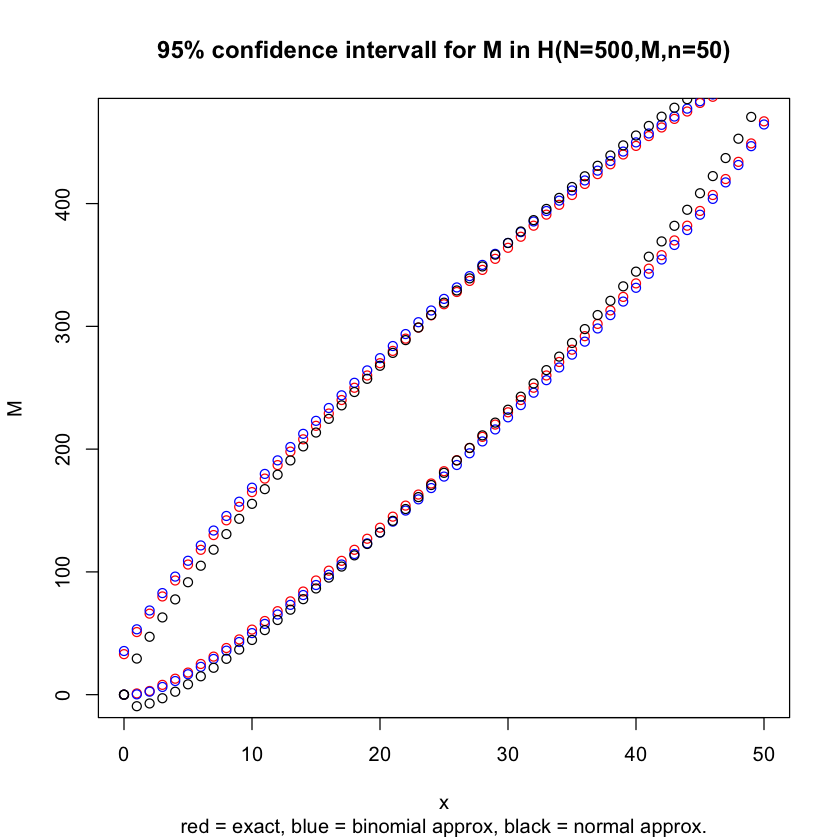

In [1]:
########################################################
# Consider an urn with M white balls and N-M black. n 
# balls are drawn without replacement and X denotes the
# number of white balls in the sample. N=500 and n=50 
# are known but M the number of white balls is unknown.
# Construct an two sided 1-alpha=0.95 confidence intervall
# for M based on the H(N,M,n)-distribution of X. Compare 
# it with a binomial and a normal approximation.
#
# file: infstat_conf_interval_hypergeo_M.R
########################################################

library(tidyverse)

# urn modell: N total number of balls, M = number of white
# balls, n = number of drawn balls
# X = number of white balls ~ H(N,M,n)
N <- 500
n <- 50
alpha <- 0.05

# symmetric intervals [lb,ub] for X with probability 1-alpha 
# for different values of M
sy.intervals <- tibble(
  M = 0:N,
  # quantils of H(N,M,n)
  lb = qhyper(alpha/2,M,N-M,n),  
  ub = qhyper(1-alpha/2,M,N-M,n)
)
# plot of the the intervals
plot(x=sy.intervals$M, y=sy.intervals$lb, col="blue", 
     type = "p",
     xlab = "M", ylab = "lower and upper bounds",
     main = "symmetric 95% intervals for X")
points(x=sy.intervals$M, y=sy.intervals$ub, col="red")

# Mention the lb- and ub-functions are not strictly monotonously
# increasing: use for given value of X the min of the 
# corresponding ub values and the max of the corresponding lb 
# values of M as an inverse of the two function. These values
# are the bounds of the confidence intervals.
ex.conf.intervall <- function(x) {
  return(c(
    sy.intervals %>%
      filter(ub == x) %>% 
      mutate(l = min(M)) %>% 
      select(l) %>% 
      unique() %>% 
      as.numeric(),
    sy.intervals %>%
      filter(lb == x) %>%
      mutate(u = max(M)) %>% 
      select(u) %>% 
      unique() %>% 
      as.numeric()
  ))
}

# The binom.test(x,n) function returns in the variable 
# conf.int the confidence interval for p=M/N if they are X
# white balls in a sample of n balls drawn from the urn
# with replacement
binom.appr.conf.intervall <- function(x) {
  return(
    c(
      binom.test(x, n, conf.level = 1-alpha)$conf.int[1]*N,
      binom.test(x, n, conf.level = 1-alpha)$conf.int[2]*N
    )
  )
}

# normal approximation of the confidence interval for an
# unknown proportion if x white balls are in a sample of
# n balls drwan with replacement
normal.appr.conf.intervall <- function(x) {
  return(
    c(
      N*(x/n -qnorm(1-alpha/2)*sqrt(x*(1-x/n)/n^2)),
      N*(x/n +qnorm(1-alpha/2)*sqrt(x*(1-x/n)/n^2))
    )
  )
}

# tibble of the bounds of the confidence intervalls for M
# for all possibloe values of X
tab <- tibble(
  X = 0:n) %>% 
  group_by(X) %>%
  mutate(ex.lb=ex.conf.intervall(X)[1],
         ex.ub=ex.conf.intervall(X)[2],
         binom.lb=binom.appr.conf.intervall(X)[1],
         binom.ub=binom.appr.conf.intervall(X)[2],
         norm.lb=normal.appr.conf.intervall(X)[1],
         norm.ub=normal.appr.conf.intervall(X)[2]
         )

# plot of all bounds
plot(x=tab$X, y=tab$ex.lb, col="red",
     xlab = "x", ylab = "M",
     main = "95% confidence intervall for M in H(N=500,M,n=50)",
     sub = "red = exact, blue = binomial approx, black = normal approx.")
points(x=tab$X, y=tab$ex.ub, col="red")
points(x=tab$X, y=tab$binom.lb, col="blue")
points(x=tab$X, y=tab$binom.ub, col="blue")
points(x=tab$X, y=tab$norm.lb, col="black")
points(x=tab$X, y=tab$norm.ub, col="black")

In [19]:
install.packages("xtable")


Die heruntergeladenen Bin"arpakete sind in 
	/var/folders/t0/f054bgvj7d514yq2qlg1czv80000gp/T//RtmpxS59PN/downloaded_packages


In [5]:
install.packages("TeachingDemos")
##################################################
# A population is known to be normally distributed 
# with a standard deviation of 2.8.
#
# file: infstat_conf_interval_normal_mean.R
##################################################

# a) Compute the 95% confidence interval on the mean
sample <- c(8, 9, 10, 13, 14, 16, 17, 20, 21)
alpha <- 0.05
m <- mean(sample)
m
s <- 2.8
q_a <- qnorm(1-alpha/2,0,1)
q_a
u <- m-q_a*s/sqrt(length(sample))
o <- m+q_a*s/sqrt(length(sample))
u;o

# b) Now compute the 99% confidence interval using the same data.
alpha <- 0.01
q_a <- qnorm(1-alpha/2,0,1)
q_a
u <- m-q_a*s/sqrt(length(sample))
o <- m+q_a*s/sqrt(length(sample))
u;o

# Solution applying z.test() from the TeachingDemos package
library(TeachingDemos)
z.test(x= sample, sd = 2.8, alternative = "two.sided", conf.level = 0.95)$conf.int  # a)
z.test(x = sample, sd = 2.8, alternative = "two.sided", conf.level = 0.99)$conf.int # b)


Die heruntergeladenen Bin"arpakete sind in 
	/var/folders/t0/f054bgvj7d514yq2qlg1czv80000gp/T//RtmpxS59PN/downloaded_packages


[1] 14.22222

[1] 1.959964

[1] 12.39292

[1] 16.05152

[1] 2.575829

[1] 11.81811

[1] 16.62633

[1] 12.39292 16.05152
attr(,"conf.level")
[1] 0.95

[1] 11.81811 16.62633
attr(,"conf.level")
[1] 0.99

In [6]:
########################################################
# At a certain farm the weight of a peach (in ounces) 
# at harvest time is a normally distributed random 
# variable with standard deviation 0.5. How many peaches 
# must be sampled to estimate the mean weight with a
# margin of error pm 0.2 and with 95% confidence.
#
# file: infstat_conf_interval_peach.R
########################################################

alpha <- 0.05; s <- 0.5; margin <- 0.2
q_a <- qnorm(1-alpha/2,0,1); q_a
# margin >= q*s/n^0.5
n <- ceiling((q_a*s/margin)^2)
n

[1] 1.959964

[1] 25

In [7]:
##################################################
# An advertising agency wants to construct a 99% 
# confidence lower bound for the proportion of 
# dentists who recommend a certain brand of toothpaste. 
# The margin of error is to be 0.02. How large should
# the sample be?
#
# file: infstat_conf_interval_prop_sample_size.R
##################################################

alpha <- 0.01; margin <- 0.02
c <- qnorm(1-alpha,0,1)
f <- seq(0,1,length=101)
n <- max(ceiling(c^2 * f*(1-f)/(margin^2)))
n

# If f <= 0.2, we get
f <- seq(0,0.2,length=21)
n <- max(ceiling(c^2 * f*(1-f)/(margin^2)))
n



[1] 3383

[1] 2165

In [8]:
########################################################
# You read about a survey in a newspaper and find 
# that 70% of the 250 people sampled prefer Candidate A.
# a) Compute the 95% confidence interval.
# b) You are surprised by this survey because you thought 
#    that more like 50% of the population preferred this 
#    candidate. Based on this sample, is 50% a possible 
#    population proportion?
#
# file: infstat_conf_interval_prop_survey.R
########################################################

n <- 250; p <- 0.7; alpha <- 0.05

# normal approximation
l.appr <- p - qnorm(1-alpha/2)*sqrt(p*(1-p)/n)
u.appr <- p + qnorm(1-alpha/2)*sqrt(p*(1-p)/n)
l.appr; u.appr
# Rule of thumb: n*p and n*(1-p) should be > 10
n*p; n*(1-p)

# exact
xp <- seq(0,1,length=1+10^4)
l.ex <- xp[min(which(qbinom(1-alpha/2,n,xp) == p*n))]
u.ex <- xp[max(which(qbinom(alpha/2,n,xp) == p*n))]
l.ex; u.ex

# exact confidence interval with R-function
binom.test(x=0.7*250,n=250,conf.level=1-alpha)$conf.int

# If p = 0.5, the probability to observe 0.7*250 or more voters
# in a sample of size 250 is
1-pbinom(n*p-1, size = n, prob = 0.5) # approx 0

[1] 0.6431948

[1] 0.7568052

[1] 175

[1] 75

[1] 0.6391

[1] 0.7561

[1] 0.6390569 0.7561285
attr(,"conf.level")
[1] 0.95

[1] 1.105233e-10

In [9]:
####################################################
# At a telemarketing firm, the length of a telephone 
# solicitation (in seconds) is a normally distributed 
# random variable with mean mu and standard deviation
# sigma, both unknown. A sample of 50 calls has mean 
# length 300 and standard deviation 60.
#
# file: infstat_conf_interval_telefirm.R
#####################################################
n <- 51; m <- 300; s_sample <- 60; alpha <- 0.05

#  a) Construct the 95% confidence upper bound for mu.
t_a <- qt(1-alpha,n-1)
t_a
o <- m+t_a*s_sample/sqrt(n)
o

#  b) Construct the 95% confidence lower bound for sigma.
chi <- qchisq(1-alpha,n-1)
chi
u <- (n-1)*s_sample^2/chi
sqrt(u)

[1] 1.675905

[1] 314.0804

[1] 67.50481

[1] 51.63794

In [10]:
##################################################
# You take a sample of 22 from a population of test 
# scores, and the mean of your sample is 60.
#
# file: infstat_conf_intervall_normal_mean_sd_unknown.R
###################################################
n <- 22
m <- 60

# a) You know the standard deviation of the population is 10. What
#    is the 99\% confidence interval on the population mean.
alpha <- 0.01
s <- 10
q_a <- qnorm(1-alpha/2,0,1)
q_a
u <- m-q_a*s/sqrt(n)
o <- m+q_a*s/sqrt(n)
u;o


# Solution applying z.test() from the TeachingDemos package
library(TeachingDemos)
z.test(x = m, sd = 10, alternative = "two.sided", n = 22, conf.level = 0.99)$conf.int 

# b) Now assume that you do not know the population standard
#    deviation, but the standard deviation in your sample is 10. What
#    is the 99\% confidence interval on the mean now?
s_sample <- 10
t_a <- qt(1-alpha/2,n-1)
t_a
u <- m-t_a*s/sqrt(n)
o <- m+t_a*s/sqrt(n)
u;o

[1] 2.575829

[1] 54.50831

[1] 65.49169

[1] 54.50831 65.49169
attr(,"conf.level")
[1] 0.99

[1] 2.83136

[1] 53.96352

[1] 66.03648

In [11]:
####################################################
# Calculate for the given sample from normally 
# distributed population the 95% confidence intervals
# a) for the mean, if the standard deviation is 2
# b) for the mean, if the standard deviation is unknown
# a) for the variance, if the mean is 250
# a) for the variance, if the mean is unknown
# 
# file: infstat_conf_intervall_normal_mu_sigma.R
#####################################################

# create sample values
# s.values <- round(rnorm(n=20, mean = 251, sd = 2),1)
s.values <- c(247.4,249.0,248.5,247.5,250.6,252.2,253.4,248.3,251.4,246.9,
              249.8,250.6,252.7,250.6,250.6,252.5,249.4,250.6,247.0,249.4)
# characteristics of the sample
n <- length(s.values)
xbar <- mean(s.values)
s <- sd(s.values)
# level 1-alpha
alpha <- 0.05

# confidence intervalls for mu
# a) assumption: sigma = 2
sigma <- 2
l.a <- xbar - qnorm(1-alpha/2)*sigma/sqrt(n)
u.a <- xbar + qnorm(1-alpha/2)*sigma/sqrt(n)
l.a; u.a
# b) assumption: sigma = unknown
l.b <- xbar - qt(1-alpha/2, df = n-1)*s/sqrt(n)
u.b <- xbar + qt(1-alpha/2, df = n-1)*s/sqrt(n)
l.b; u.b

# confidence intervalls for sigma^2
# c) assumption: mu = 250
mu <- 250
Qn <- sum((s.values - mu)^2)
l.c <- Qn/qchisq(1-alpha/2, df = n)
u.c <- Qn/qchisq(alpha/2, df = n)
l.c; u.c
# d) assumption: mu unknown
l.d <- (n-1)*s^2/qchisq(1-alpha/2, df = n-1)
u.d <- (n-1)*s^2/qchisq(alpha/2, df = n-1)
l.d; u.d

# solutions applying z.test(), sigma.test() from TeachingDemos and t.test()
library(TeachingDemos)
z.test(x = s.values, sd = 2, alternative = "two.sided", conf.level = 0.95)$conf.int # a)
t.test(x = s.values, alternative = "two.sided", conf.level = 0.95)$conf.int         # b)
sigma.test(x = s.values, alternative = "two.sided", conf.level = 0.95)              # d)


[1] 249.0435

[1] 250.7965

[1] 249.0084

[1] 250.8316

[1] 2.113574

[1] 7.530151

[1] 2.194426

[1] 8.094298

[1] 249.0435 250.7965
attr(,"conf.level")
[1] 0.95

[1] 249.0084 250.8316
attr(,"conf.level")
[1] 0.95


	One sample Chi-squared test for variance

data:  s.values
X-squared = 72.092, df = 19, p-value = 8.232e-08
alternative hypothesis: true variance is not equal to 1
95 percent confidence interval:
 2.194426 8.094298
sample estimates:
var of s.values 
       3.794316 


In [12]:
##################################################
# A researcher was interested in knowing how many 
# people in the city supported a new tax. She sampled
# 100 people from the city and found that 40% of 
# these people supported the tax. What is the upper
# limit of the 95% (one-side) confidence interval 
# on the population proportion?
#
# file: infstat_conf_intervall_prop_one_sided.R
##################################################

n <- 100; p <- 0.4; alpha <- 0.05

# normal approximation
u.appr <- p + qnorm(1-alpha)*sqrt(p*(1-p)/n)
u.appr
# Rule of thumb: n*p and n*(1-p) should be greater than 10
n*p; n*(1-p)

# exact
xp <- seq(0,1,length=1+10^4)
u.ex <- xp[max(which(qbinom(alpha,n,xp) == p*n))]
u.ex

# exact confidence interval with R-function
binom.test(x=40, n=100, alternative = "less",
           conf.level=1-alpha)$conf.int

[1] 0.480581

[1] 40

[1] 60

[1] 0.487

[1] 0.0000000 0.4870242
attr(,"conf.level")
[1] 0.95


Die heruntergeladenen Bin"arpakete sind in 
	/var/folders/t0/f054bgvj7d514yq2qlg1czv80000gp/T//RtmpxS59PN/downloaded_packages


Warning message in dhyper(x = n.rd.2, m = n.marked + (n.caught.1 - n.rd.1), n = N - :
"NaNs wurden erzeugt"


N,est.1,est.2
<int>,<dbl>,<dbl>
7,0.0000000,NaN
8,0.3750000,0.00000000
9,0.5000000,0.00000000
10,0.5250000,0.00000000
11,0.5090909,0.00000000
12,0.4772727,0.06749311
13,0.4405594,0.11981026
14,0.4038462,0.14120495
15,0.3692308,0.14057737


N,est.1
<int>,<dbl>
10,0.525


N,est.2
<int>,<dbl>


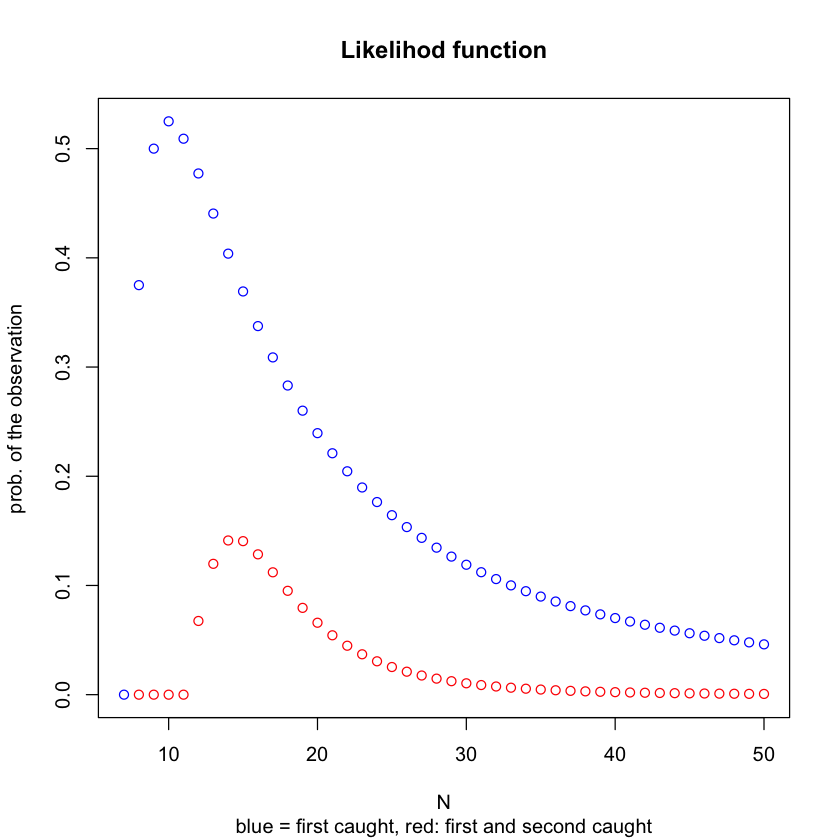

In [20]:
#########################################################
# To determine the number of N of red deers living in a
# precinct region 7 red deer were caught and marked in a 
# trapping action. Afterwards the animals were again 
# released. After a certain time, another trapping action 
# was started. Thereby 3 red deer were caught, whereby 2 
# already were marked. It is assumed that between the no 
# influx or outflow of red deer in the region and that the 
# animals were not able to pass the region within a short 
# period of time. 
# Determine a maximum likelihood estimator for the total 
# number N of the red deer living in the region.
#
# file: max_likelihood_deers_sol.R
#########################################################

library(tidyverse)
library(xtable)
install.packages("xtable")

n.marked <- 7
n.caught.1 <- 3
n.rd.1 <- 2
n.caught.2 <- 8
n.rd.2 <- 4

# create a tibble with prob. of the observation dep. on N
ml.est.N <- tibble(
  N = n.marked:50,
  est.1 = dhyper(x=n.rd.1,m=n.marked,n=N-n.marked,k=n.caught.1),
  est.2 = est.1 * 
    dhyper(x=n.rd.2,m=n.marked+(n.caught.1-n.rd.1),
           n=N-n.marked-(n.caught.1-n.rd.1),k=n.caught.2)
)
head(ml.est.N,20)

# diagramm of the likelihood functions
plot(x = ml.est.N$N, y = ml.est.N$est.1, col = "blue",
     xlab = "N", ylab = "prob. of the observation",
     main = "Likelihod function",
     sub = "blue = first caught, red: first and second caught")
points(x = ml.est.N$N, y = ml.est.N$est.2, col = "red")

# find the maxima
ML.EST.1 <- ml.est.N %>%
  select(N, est.1) %>%
  filter(est.1 == max(est.1))
ML.EST.2 <- ml.est.N %>%
  select(N, est.2) %>%
  filter(est.2 == max(est.2))
ML.EST.1; ML.EST.2